# Objectifs

- Prise en main du problème de classification
- Exploration de divers modèles de ce type
- Mise en place d'une démarche compléte: train/test split puis cross validation

# Exploration du dataset

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
type(digits)

sklearn.utils._bunch.Bunch

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
type(digits.data)

numpy.ndarray

In [8]:
digits.data.shape

(1797, 64)

In [10]:
type(digits.target)

numpy.ndarray

In [11]:
digits.target.shape

(1797,)

In [12]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
digits.images.shape

(1797, 8, 8)

## Exercice

Utiliser `matplotlib` pour visuliser les images encodées dans `digits.data` vous mettrez le chiffre correspondant en titre.

In [16]:
chiffre = digits.target[0]
image = digits.data[0].reshape(8, 8)

Text(0.5, 1.0, 'chiffre=0')

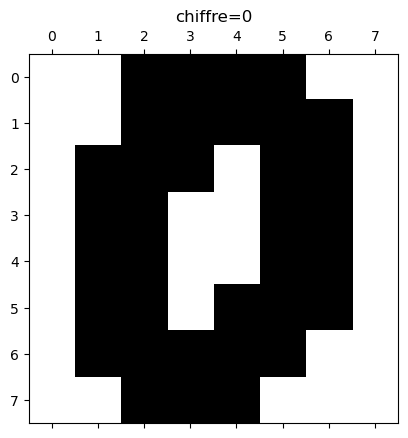

In [17]:
plt.spy(image)
plt.title(f"{chiffre=}")

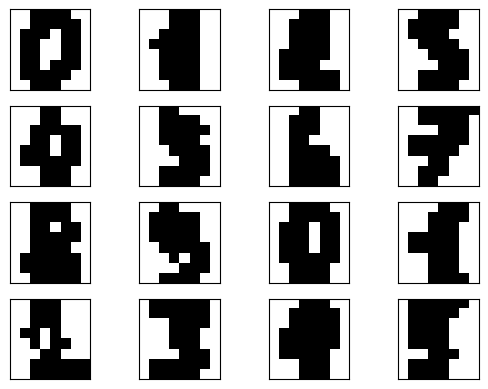

In [23]:
fig, reps = plt.subplots(nrows=4, ncols=4)
for i in range(4):
    for j in range(4):
        reps[i,j].spy(digits.data[4 * i + j].reshape(8,8))
        reps[i,j].set_xticks([])
        reps[i,j].set_yticks([])

## Exercice

Remplacer `plt.spy` pour visualiser les niveaux de gris.

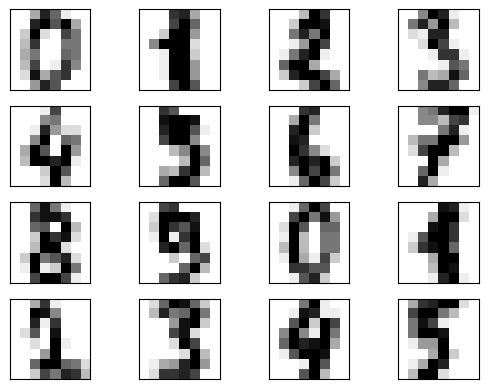

In [27]:
fig, reps = plt.subplots(nrows=4, ncols=4)
for i in range(4):
    for j in range(4):
        reps[i,j].imshow(
            15 - digits.data[4 * i + j].reshape(8,8),
            cmap="gray",
            vmin=0,
            vmax=15,
        )
        reps[i,j].set_xticks([])
        reps[i,j].set_yticks([])

# Machine Learning

## Exercice

Entrainer un modèle de classification de type *plus proches voisins* sur le dataset en utilisant l'approche standard.

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score

In [30]:
X_tr, X_te, y_tr, y_te = train_test_split(digits.data, digits.target, test_size=0.2)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
%%time
resultat = dict()
for nb_voisins in range(2, 15):
    modele = KNeighborsClassifier(n_neighbors=nb_voisins)
    resultat[nb_voisins] = cross_val_score(modele, X_tr, y_tr).mean()

CPU times: total: 38.1 s
Wall time: 13.7 s


In [33]:
resultat

{2: 0.9805095818815331,
 3: 0.9853803716608593,
 4: 0.9791182733255903,
 5: 0.9832970383275261,
 6: 0.9798151374370887,
 7: 0.9798127177700348,
 8: 0.9756363724351529,
 9: 0.9770301006581494,
 10: 0.9777269647696476,
 11: 0.9749395083236546,
 12: 0.9728537553232675,
 13: 0.9714648664343786,
 14: 0.9700687185443282}

In [34]:
choix = KNeighborsClassifier(n_neighbors=3)
choix.fit(X_tr, y_tr)

KNeighborsClassifier(n_neighbors=3)

In [35]:
choix.score(X_tr, y_tr)

0.9923451635351427

In [36]:
choix.score(X_te, y_te)

0.9861111111111112

Nous ne sommes pas en situation de surapprentissage, on pourrait déployer le modèle en production.

### Représentation alternative des erreurs

In [37]:
from sklearn.metrics import confusion_matrix

In [40]:
np.concatenate((X_tr, X_te)).shape

(1797, 64)

In [41]:
np.concatenate((y_tr, y_te))

array([1, 2, 0, ..., 2, 0, 9])

In [43]:
mc = confusion_matrix(np.concatenate((y_tr, y_te)), choix.predict(np.concatenate((X_tr, X_te))))
mc

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 176,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 182,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 179,   1,   0,   0,   2],
       [  0,   0,   0,   0,   0,   0, 180,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,   4,   0,   0,   0,   0,   0,   0, 170,   0],
       [  0,   0,   0,   3,   1,   0,   0,   0,   2, 174]], dtype=int64)

In [45]:
# Calcul du score à partir de la matrice de confusion
somme_diagonale = 0
for i in range(10):
    somme_diagonale += mc[i,i]

print(somme_diagonale / mc.sum())



0.9910962715637173


In [47]:
# exemple utilisation de einsum
M = np.array([[1, 2, 3, 3], [4, 5, 6, 6], [7, 8, 9, 9]])
M

array([[1, 2, 3, 3],
       [4, 5, 6, 6],
       [7, 8, 9, 9]])

In [48]:
u = np.array([1, 2, 3, 4])
u

array([1, 2, 3, 4])

In [51]:
M * u

array([[ 1,  4,  9, 12],
       [ 4, 10, 18, 24],
       [ 7, 16, 27, 36]])

In [50]:
M @ u

array([26, 56, 86])

In [52]:
np.einsum("ij,j", M, u)

array([26, 56, 86])

In [53]:
# Calcul du score via einsum pour plus de vitesse d'exécution
np.einsum("ii", mc) / mc.sum()

0.9910962715637173

## Exercice

Reprendre la démarche en ajoutant aussi

- Regression logistique
- gradient boosting
- random forest
- gaussian process
- réseaux de neurones
- bayes naive
- support vector


## Régression logistique

Consulter [le guide de l'utilisateur de sklearn](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) pour une explication de l'algorithme.

In [54]:
from sklearn.linear_model import LogisticRegression

In [61]:
lr = LogisticRegression(max_iter=10000)
cross_val_score(lr, X_tr, y_tr).mean()

0.9645107433217189

## Bayesien Naif

In [58]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [63]:
gnb = GaussianNB()
cross_val_score(gnb, X_tr, y_tr).mean()

0.8538545296167246

In [65]:
mnb = MultinomialNB()
cross_val_score(mnb, X_tr, y_tr).mean()

0.8970020325203253

## A Suivre

In [59]:
from sklearn.svm import SVC

In [56]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [57]:
from sklearn.neural_network import MLPClassifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier